In [1]:
from src.recognize import load_database, recognize_song
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = load_database("../songs")
match = recognize_song("../recordings/Bad_street_02.m4a", db)

if match:
    print(f"Matched: {match[0]} (score: {match[1]})")
else:
    print("No match found.")

Matched: Taylor Swift - Delicate.m4a (score: 3)


In [3]:
recording_dir = '../recordings'
ground_truth_map = {
    'Bad': 'I Did Something Bad',
    'Delicate': 'Taylor Swift - Delicate',
    'Gangam': 'PSY - GANGNAM STYLE(강남스타일) M⧸V',
    'Karma': 'Karma',
    'Mirrorball': 'Taylor Swift – mirrorball (Official Lyric Video)'
}
results = []
db = load_database("../songs")

In [4]:
for filename in os.listdir(recording_dir):
    if not filename.endswith('.m4a'):
        continue
    
    match = re.match(r"([A-Za-z]+)_(\w+)_\d+\.m4a", filename)
    if not match:
        continue

    song_key, environment = match.groups()
    ground_truth = ground_truth_map.get(song_key)
    file_path = os.path.join(recording_dir, filename)
    
    predicted_file, offset = recognize_song(file_path, db)  # tuple unpacking
    predicted_clean = os.path.splitext(predicted_file)[0]  # remove .m4a

    print(f"File: {filename}, Predicted: {predicted_clean}, Ground Truth: {ground_truth}")
    results.append({
        'song': ground_truth,
        'environment': environment,
        'correct': int(predicted_clean == ground_truth)
    })
df = pd.DataFrame(results)

File: Delicate_street_02.m4a, Predicted: Taylor Swift - Delicate, Ground Truth: Taylor Swift - Delicate
File: Bad_cafe_01.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_cafe_02.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_no_noise_01.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_org_01.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_org_02.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_org_03.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_street_01.m4a, Predicted: I Did Something Bad, Ground Truth: I Did Something Bad
File: Bad_street_02.m4a, Predicted: Taylor Swift - Delicate, Ground Truth: I Did Something Bad
File: Bad_street_03.m4a, Predicted: Taylor Swift – mirrorball (Official Lyric Video), Ground Truth: I Did Something Bad
File: Delicate_cafe_01.m4a, Predicted: Taylor Swift - D

In [5]:
df

,song,environment,correct
0,Taylor Swift - Delicate,street,1
1,I Did Something Bad,cafe,1
2,I Did Something Bad,cafe,1
3,I Did Something Bad,no_noise,1
4,I Did Something Bad,org,1
5,I Did Something Bad,org,1
6,I Did Something Bad,org,1
7,I Did Something Bad,street,1
8,I Did Something Bad,street,0
9,I Did Something Bad,street,0


/media/marta/Dane/Sem7/cloud_computing_project/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/media/marta/Dane/Sem7/cloud_computing_project/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/media/marta/Dane/Sem7/cloud_computing_project/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/media/marta/Dane/Sem7/cloud_computing_project/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/media/marta/Dane/Sem7/cloud_computing_project/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from fo

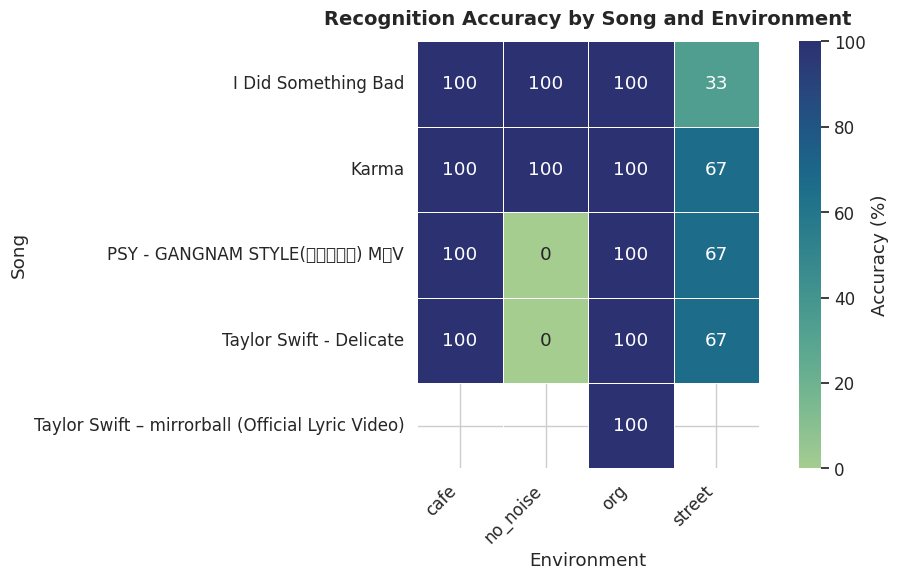

In [6]:
pivot = df.pivot_table(index='song', columns='environment', values='correct', aggfunc='mean') * 100
sns.set(style='whitegrid', font_scale=1.1)
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    pivot, 
    annot=True, 
    fmt=".0f", 
    cmap='crest', 
    linewidths=.5, 
    cbar_kws={'label': 'Accuracy (%)'},
    square=True
)

plt.title("Recognition Accuracy by Song and Environment", fontsize=14, weight='bold', pad=12)
plt.xlabel("Environment")
plt.ylabel("Song")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()